## ARIMA

In [1]:
# !pip install pmdarima
# !pip install mplfinance

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

from scipy import stats
from scipy.stats import zscore

from pmdarima.arima.utils import ndiffs

import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox

from itertools import product
from tqdm.notebook import tqdm

import datetime
from datetime import date, timedelta

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
import datetime 
from datetime import date, timedelta

start_date = datetime.datetime(2015, 1, 1)
end_date  = datetime.datetime(2023, 8, 23)

stock_name = "GOOGL"

my_stocks = yf.download(tickers = ["GOOGL", "PANW", "AMZN", "BUD", "AAPL", "MSFT", "GME", "TSLA", "NFLX", "META", "WMT", "WBA", "NVDA"]
, start=start_date, end=end_date, group_by='tickers')
my_stocks.head()

[*********************100%%**********************]  13 of 13 completed


PANW                                                       \
                 Open       High        Low      Close  Adj Close   Volume   
Date                                                                         
2015-01-02  40.866669  40.986668  39.200001  40.473331  40.473331  4951200   
2015-01-05  40.243332  41.396667  40.060001  41.243332  41.243332  4050600   
2015-01-06  41.333332  41.730000  39.363335  40.616669  40.616669  4053600   
2015-01-07  41.453335  42.323334  41.209999  41.843334  41.843334  3791400   
2015-01-08  42.186668  42.540001  41.933334  42.403332  42.403332  2144400   

               GME                          ...       META             \
              Open    High     Low   Close  ...        Low      Close   
Date                                        ...                         
2015-01-02  8.5150  8.5400  8.3125  8.4500  ...  77.699997  78.449997   
2015-01-05  8.3800  8.7200  8.3325  8.6800  ...  76.860001  77.190002   
2015-01-06  8.7925  9.0075  8.3800  8.4225  ...  75.360001  76.150002   
2015-01-07  8.5725  8.6700  8.2450  8.3250  ...  75.820000  76.150002   
2015-01-08  8.4000  8.5425  8.3300  8.4225  ...  76.080002  78.180000   

                                        BUD                          \
            Adj Close    Volume        Open        High         Low   
Date                                                                  
2015-01-02  78.449997  18177500  112.300003  112.480003  110.980003   
2015-01-05  77.190002  26452200  109.040001  109.709999  107.769997   
2015-01-06  76.150002  27399300  107.279999  108.540001  106.570000   
2015-01-07  76.150002  22045300  108.440002  109.949997  108.139999   
2015-01-08  78.180000  23961000  111.589996  113.769997  111.379997   

                                            
                 Close  Adj Close   Volume  
Date                                        
2015-01-02  111.739998  91.221947   908400  
2015-01-05  108.089996  88.242165  2010600  
2015-01-06  107.849998  88.046211  1717700  
2015-01-07  109.419998  89.327934  1837000  
2015-01-08  112.879997  92.152588  1257200  

[5 rows x 78 columns]

In [4]:
df_adj =  my_stocks[stock_name]['Adj Close'].copy()
df_adj
df = my_stocks[stock_name]
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,26.629999,26.790001,26.393999,26.477501,26.477501,26480000
2015-01-05,26.357500,26.399500,25.887501,25.973000,25.973000,41182000
2015-01-06,26.025000,26.060499,25.277500,25.332001,25.332001,54456000
2015-01-07,25.547501,25.574499,25.182501,25.257500,25.257500,46918000
2015-01-08,25.075500,25.375000,24.750999,25.345501,25.345501,73054000
...,...,...,...,...,...,...
2023-08-16,128.699997,130.279999,127.870003,128.699997,128.699997,25216100
2023-08-17,129.800003,131.990005,129.289993,129.919998,129.919998,33446300
2023-08-18,128.509995,129.250000,126.379997,127.459999,127.459999,30491300


In [5]:
# Plot Adjusted Close price

def df_adj_plot():
  sns.set(rc={'figure.figsize':(16, 8)})
  df_adj.plot(label=f"{label_txt}")
  plt.title(f"{title_txt}", color = 'black', fontsize = 20)
  plt.xlabel('Date', color = 'black', fontsize = 15)
  plt.ylabel('Stock Price (p)', color = 'black', fontsize = 15);
  plt.legend()

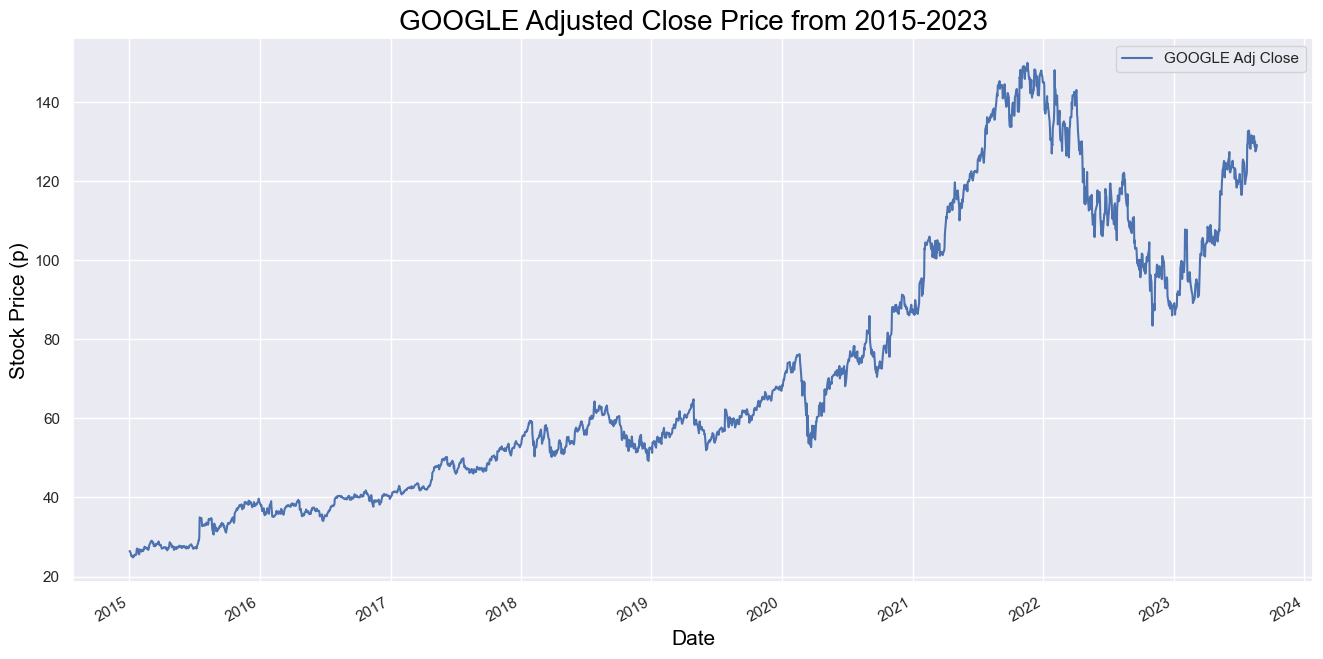

In [6]:
title_txt = "GOOGLE Adjusted Close Price from 2015-2023"
label_txt = "GOOGLE Adj Close"

df_adj_plot()

## Seasonality

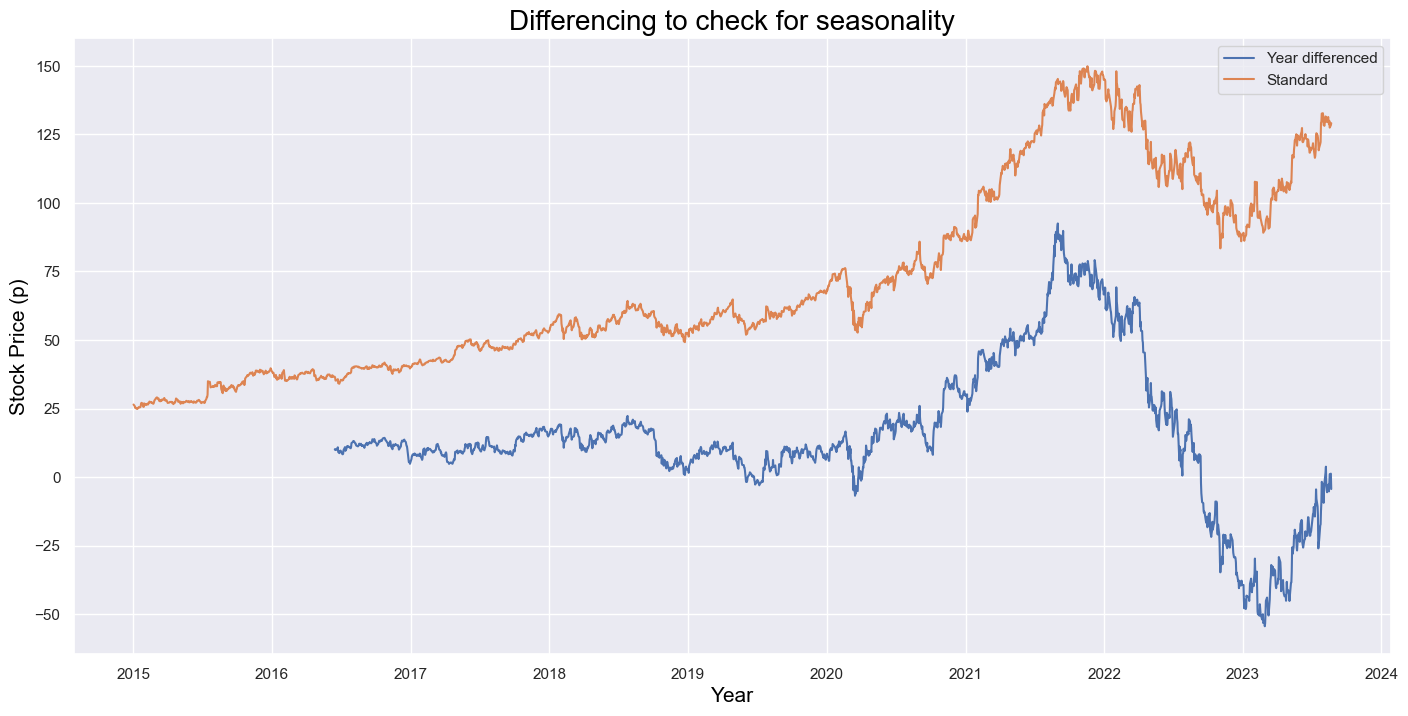

In [7]:
year_diff = df_adj.diff(periods=365)[365:]
plt.figure(figsize=(17, 8))
plt.plot(year_diff .index, year_diff , label='Year differenced')
plt.plot(df.index, df['Adj Close'], label='Standard')
plt.title("Differencing to check for seasonality", color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Stock Price (p)', color = 'black', fontsize = 15)
plt.grid(True)
plt.legend();

## AutoCorreleation

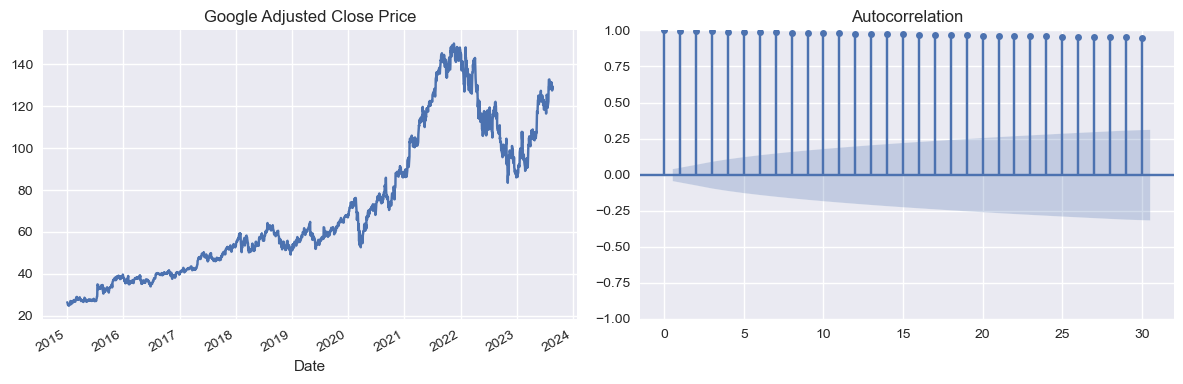

In [8]:
def acf(y, lags=None, figsize=(12, 4)):
    plt.style.use('seaborn')
    fig = plt.figure(figsize=figsize)
    layout = (1,2)
    ts_ax = plt.subplot2grid(layout, (0,0))
    acf_ax = plt.subplot2grid(layout, (0,1))

    y.plot(ax=ts_ax)
    ts_ax.set_title('Google Adjusted Close Price')
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    plt.tight_layout()
        
acf(df_adj, lags=30)

## Differencing

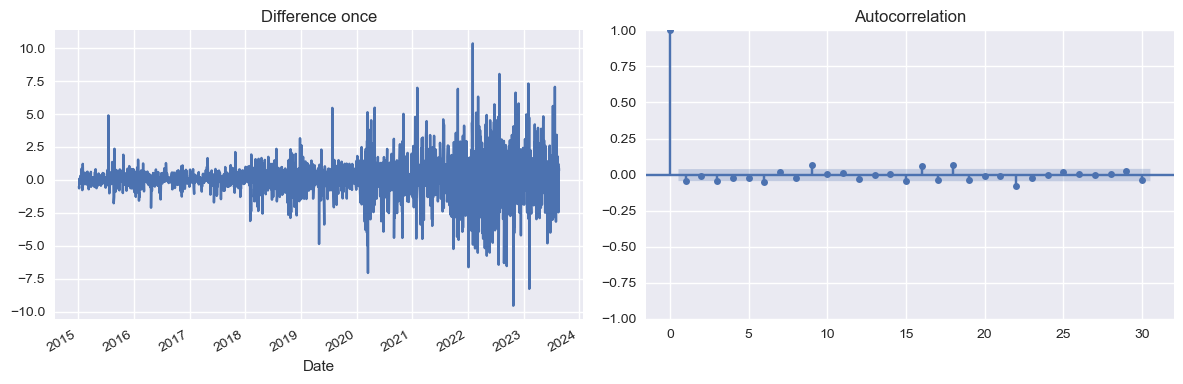

In [9]:
# First Difference
diff1 = df_adj.diff().dropna()
# Plot first order of differencing and ACF plot

def diff1_plot(y, lags=None, figsize=(12, 4)):
    plt.style.use('seaborn')
    fig = plt.figure(figsize=figsize)
    layout = (1,2)
    ax1 = plt.subplot2grid(layout, (0,0))
    acf_ax = plt.subplot2grid(layout, (0,1))

    y.plot(ax=ax1)
    ax1.set_title('Difference once')
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    plt.tight_layout()
        
diff1_plot(diff1, lags=30)

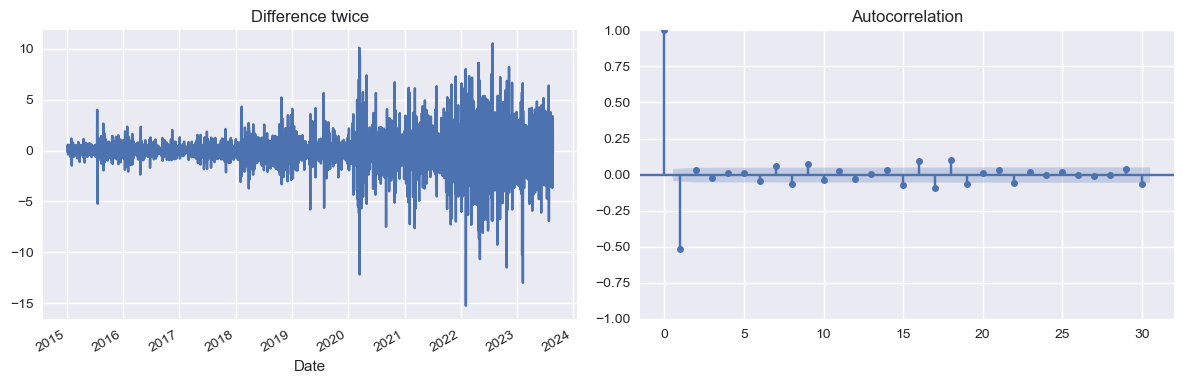

In [10]:
# Difference 2
diff2 = df_adj.diff().diff().dropna()


def diff2_plot(y, lags=None, figsize=(12, 4)):
    plt.style.use('seaborn')
    fig = plt.figure(figsize=figsize)
    layout = (1,2)
    ax1 = plt.subplot2grid(layout, (0,0))
    acf_ax = plt.subplot2grid(layout, (0,1))

    y.plot(ax=ax1)
    ax1.set_title('Difference twice')
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    plt.tight_layout()
        
diff2_plot(diff2, lags=30)

## Auto Regressive Term

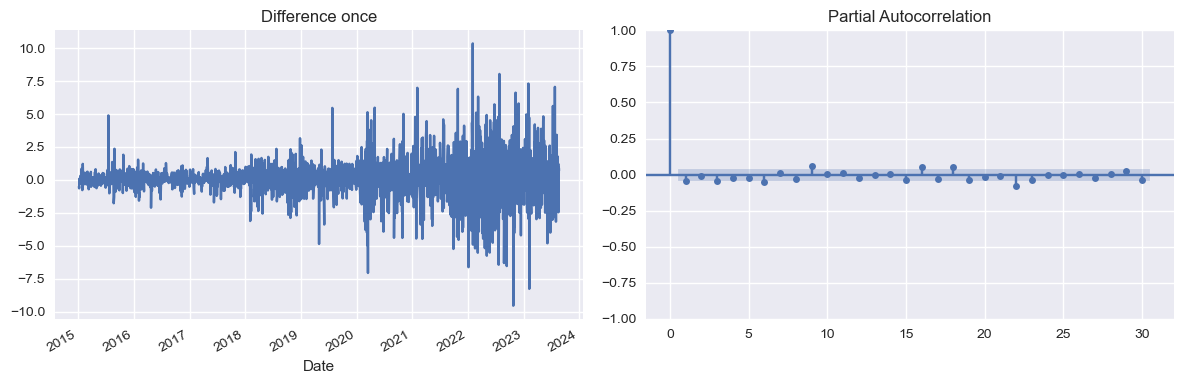

In [11]:
def pacf_plot(y, lags=None, figsize=(12, 4)):
    plt.style.use('seaborn')
    fig = plt.figure(figsize=figsize)
    layout = (1,2)
    ax1 = plt.subplot2grid(layout, (0,0))
    pacf_ax = plt.subplot2grid(layout, (0,1))

    y.plot(ax=ax1)
    ax1.set_title('Difference once')
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    plt.tight_layout()
        
pacf_plot(diff1, lags=30)

## Moving Average and Q values

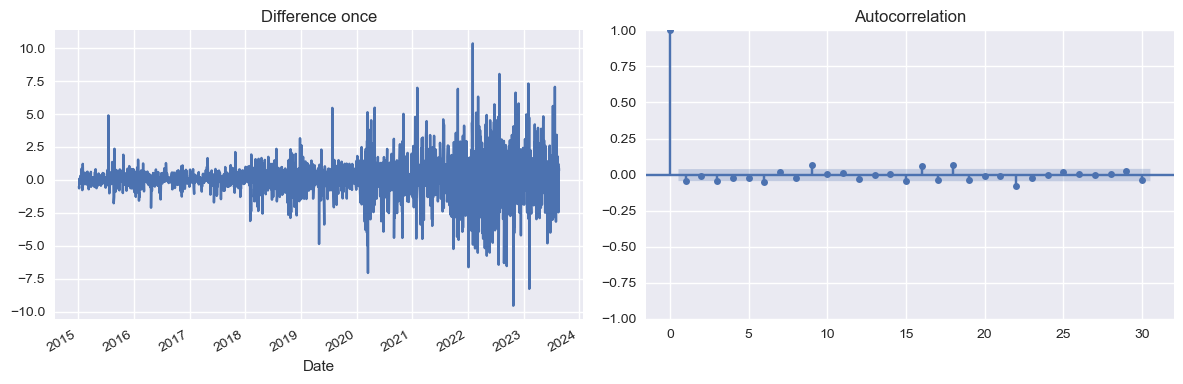

In [12]:
def diff1_plot(y, lags=None, figsize=(12, 4)):
    plt.style.use('seaborn')
    fig = plt.figure(figsize=figsize)
    layout = (1,2)
    ax1 = plt.subplot2grid(layout, (0,0))
    acf_ax = plt.subplot2grid(layout, (0,1))

    y.plot(ax=ax1)
    ax1.set_title('Difference once')
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    plt.tight_layout()
        
diff1_plot(diff1, lags=30)

In [13]:
model = ARIMA(df_adj, order=(3, 1, 3))
result = model.fit(disp=0)
print(result.summary())

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.
